In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn import linear_model


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop('Id', axis=1)

In [3]:
train['Open Date'] = pd.to_datetime(train['Open Date'], format='%m/%d/%Y')   
test['Open Date'] = pd.to_datetime(test['Open Date'], format='%m/%d/%Y')

train['OpenDays']=""
test['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(train)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(test)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')  

train['OpenDays'] = dateLastTrain['Date'] - train['Open Date']
test['OpenDays'] = dateLastTest['Date'] - test['Open Date']

train['OpenDays'] = train['OpenDays'].astype('timedelta64[D]').astype(int)
test['OpenDays'] = test['OpenDays'].astype('timedelta64[D]').astype(int)

train = train.drop('Open Date', axis=1)

In [4]:
train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,5647
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,2513
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,663
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,1064
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,2063


In [5]:
#style of plotting is set at a global level
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
train.revenue.skew()

2.793478695162504

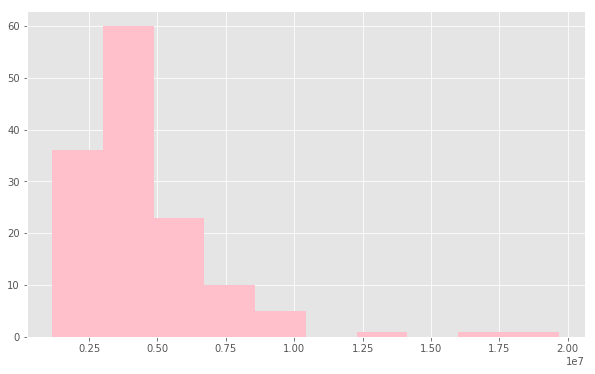

In [7]:
plt.hist(train.revenue, color='pink')
plt.show()

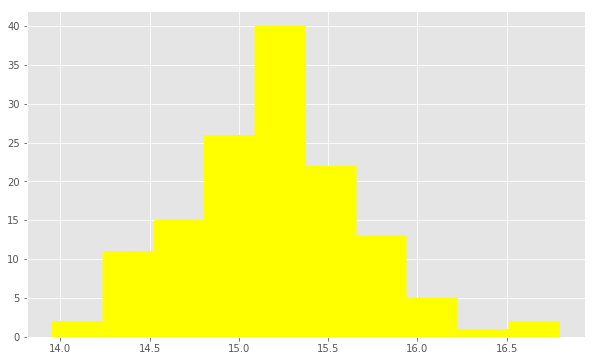

In [8]:
target= np.log(train.revenue)
plt.hist(target, color='yellow')
plt.show()


In [9]:
target.skew()


0.30740162838726504

In [10]:
numeric_features = train.select_dtypes(include=[np.number])

In [11]:
corr=numeric_features.corr()

In [12]:
#top 5(most related) directly related to sale price 
corr['revenue'].sort_values(ascending=False)[:5]

revenue     1.000000
OpenDays    0.325821
P2          0.191518
P28         0.155534
P6          0.139094
Name: revenue, dtype: float64

In [13]:
#top 5(from bottom most inversely related) directly related to sale price, greater the negative value lesser does sp gets with that relation 
corr['revenue'].sort_values(ascending=False)[-5:]


P34   -0.072343
P10   -0.073220
P8    -0.084215
P13   -0.105085
P29   -0.114846
Name: revenue, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

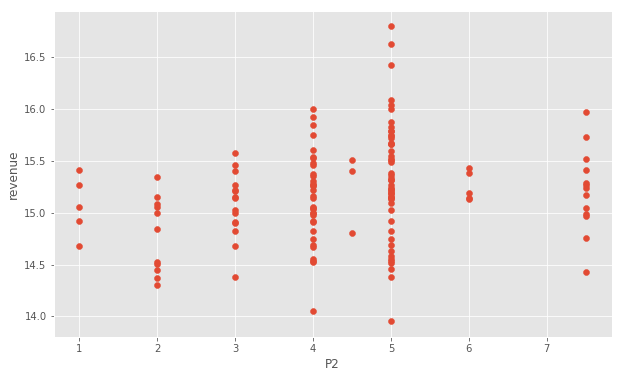

In [14]:
plt.scatter(x=train['P2'], y= target)
plt.ylabel('revenue')
plt.xlabel('P2')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

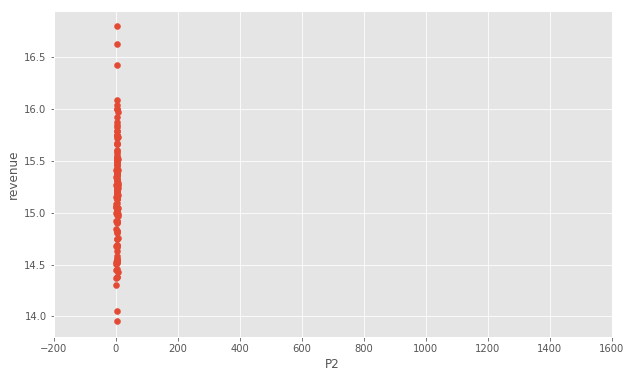

In [15]:
plt.scatter(x=train['P2'], y = np.log(train.revenue))
plt.xlim(-200, 1600)
plt.ylabel('revenue')
plt.xlabel('P2')
plt.show

In [16]:
categoricals= train.select_dtypes(exclude=[np.number])
categoricals.describe()

,City,City Group,Type
count,137,137,137
unique,34,2,3
top,İstanbul,Big Cities,FC
freq,50,78,76


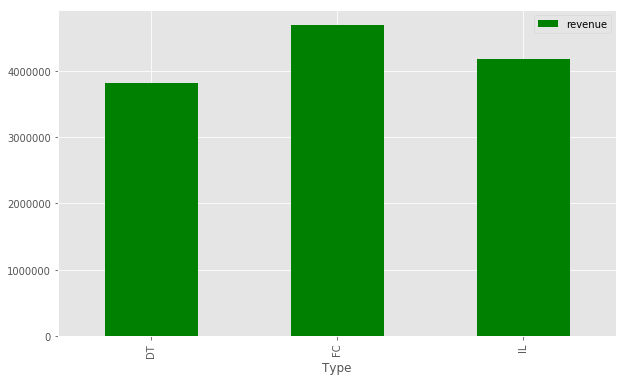

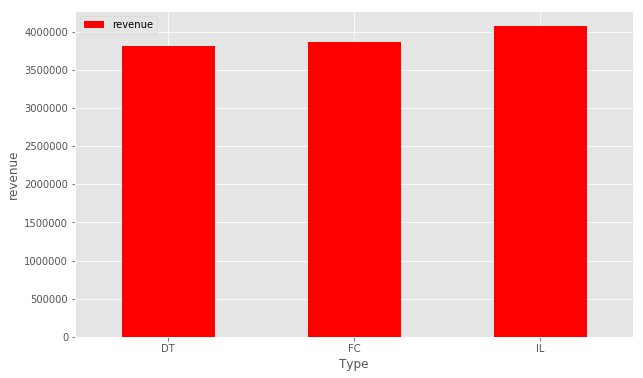

In [17]:
condition_pivot=train.pivot_table(index='Type', values='revenue', aggfunc=np.mean)
condition_pivot1=train.pivot_table(index='Type', values='revenue', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='green')
condition_pivot1.plot(kind='bar', color='red')
plt.xlabel('Type')
plt.ylabel('revenue')
plt.xticks(rotation=0)
plt.show()

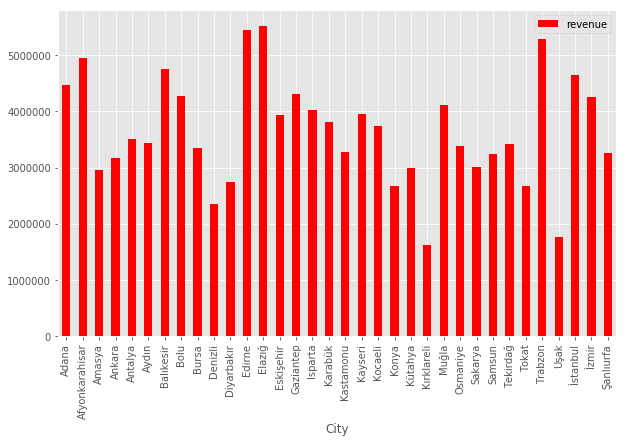

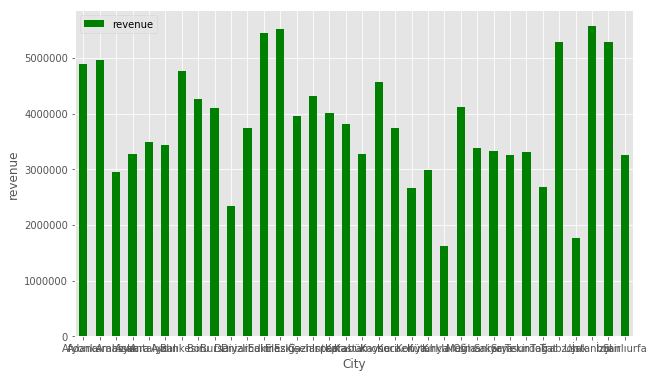

In [18]:
condition_pivot=train.pivot_table(index='City', values='revenue', aggfunc=np.mean)
condition_pivot1=train.pivot_table(index='City', values='revenue', aggfunc=np.median)

condition_pivot1.plot(kind='bar', color='red')
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('City')
plt.ylabel('revenue')
plt.xticks(rotation=0)
plt.show()

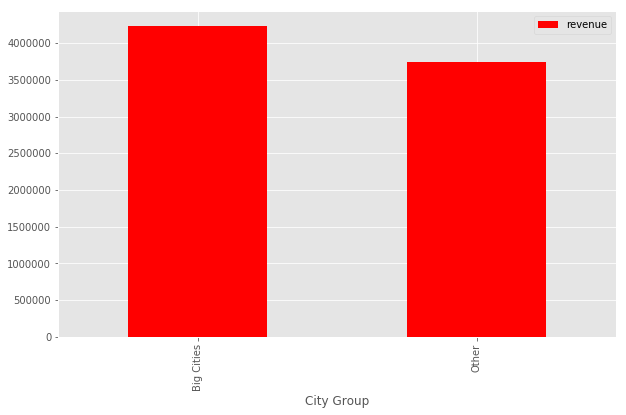

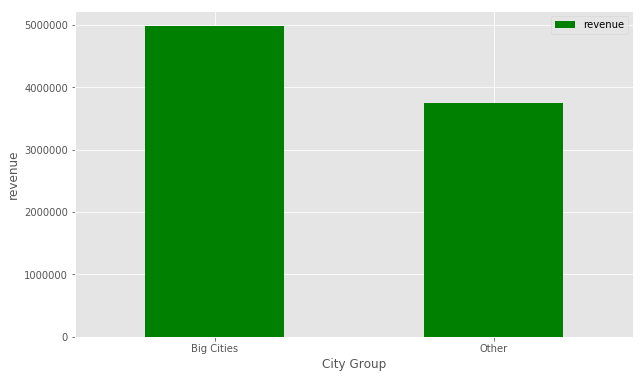

In [19]:
condition_pivot=train.pivot_table(index='City Group', values='revenue', aggfunc=np.mean)
condition_pivot1=train.pivot_table(index='City Group', values='revenue', aggfunc=np.median)

condition_pivot1.plot(kind='bar', color='red')
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('City Group')
plt.ylabel('revenue')
plt.xticks(rotation=0)
plt.show()

In [20]:
cityPerc = train[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()


citygroupDummy = pd.get_dummies(train['City Group'])
train = train.join(citygroupDummy)

citygroupDummyTest = pd.get_dummies(test['City Group'])
test = test.join(citygroupDummyTest)

train = train.drop('City Group', axis=1)
test = test.drop('City Group', axis=1)

In [21]:
xTrain = pd.DataFrame({'OpenDays':train['OpenDays'].apply(np.log),
                      'Big Cities':train['Big Cities'], 'Other':train['Other'],
                      'P2':train['P2'], 'P8':train['P8'], 'P22':train['P22'],
                      'P24':train['P24'], 'P28':train['P28'], 'P26':train['P26']})
yTrain = train['revenue'].apply(np.log)
xTest = pd.DataFrame({'OpenDays':test['OpenDays'].apply(np.log),
                      'Big Cities':test['Big Cities'], 'Other':test['Other'],
                     'P2':test['P2'], 'P8':test['P8'], 'P22':test['P22'],
                      'P24':test['P24'], 'P28':test['P28'], 'P26':test['P26']})

In [22]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

cls = RandomForestRegressor(n_estimators=150)
cls.fit(xTrain, yTrain)
pred = cls.predict(xTest)
pred = np.exp(pred)
cls.score(xTrain, yTrain)


0.8596689920414915

In [23]:
pred = cls.predict(xTest)
pred = np.exp(pred)


In [24]:
pred2 = []
for i in range(len(pred)):
    if pred[i] != float('Inf'):
        pred2.append(pred[i])

m = sum(pred2) / float(len(pred2))

for i in range(len(pred)):
    if pred[i] == float('Inf'):
        print("haha")
        pred[i] = m

In [25]:

submission = pd.DataFrame({
        "Id": test["Id"],
        "Prediction": pred
    })
submission.to_csv('Submission.csv',header=True, index=False)